In [66]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from datasets import Dataset
from wordcloud import WordCloud, ImageColorGenerator
from PIL import Image
import spacy

In [67]:
nlp = spacy.load('en_core_web_sm')

In [68]:
videos = Dataset.load_from_disk('../data/videos')
labels = np.load('../data/cluster_labels.npy')

In [69]:
df = pd.DataFrame(videos)
df['label'] = labels

In [70]:
group_0 = df.loc[df['label'] == 0]

In [71]:
corpus = ''
for index, row in group_0.iterrows():
    corpus = corpus + row['text']

In [72]:
doc = nlp(text=corpus)

In [73]:
lemmatized_corpus = []
for token in doc:
    lemmatized_corpus.append(token)

In [74]:
lemmatized_corpus_eng_words = []
words = set(nlp.vocab.strings)
for word in lemmatized_corpus:
    if str(word) in words and not word.is_stop and not word.is_punct and not word.is_digit and not str(word) == '|':
        lemmatized_corpus_eng_words.append(word)

In [75]:
lemmatized_sentence = " ".join([token.lemma_ for token in lemmatized_corpus_eng_words])

In [77]:
wc = WordCloud(width=1600, height=800).generate_from_text(lemmatized_sentence)

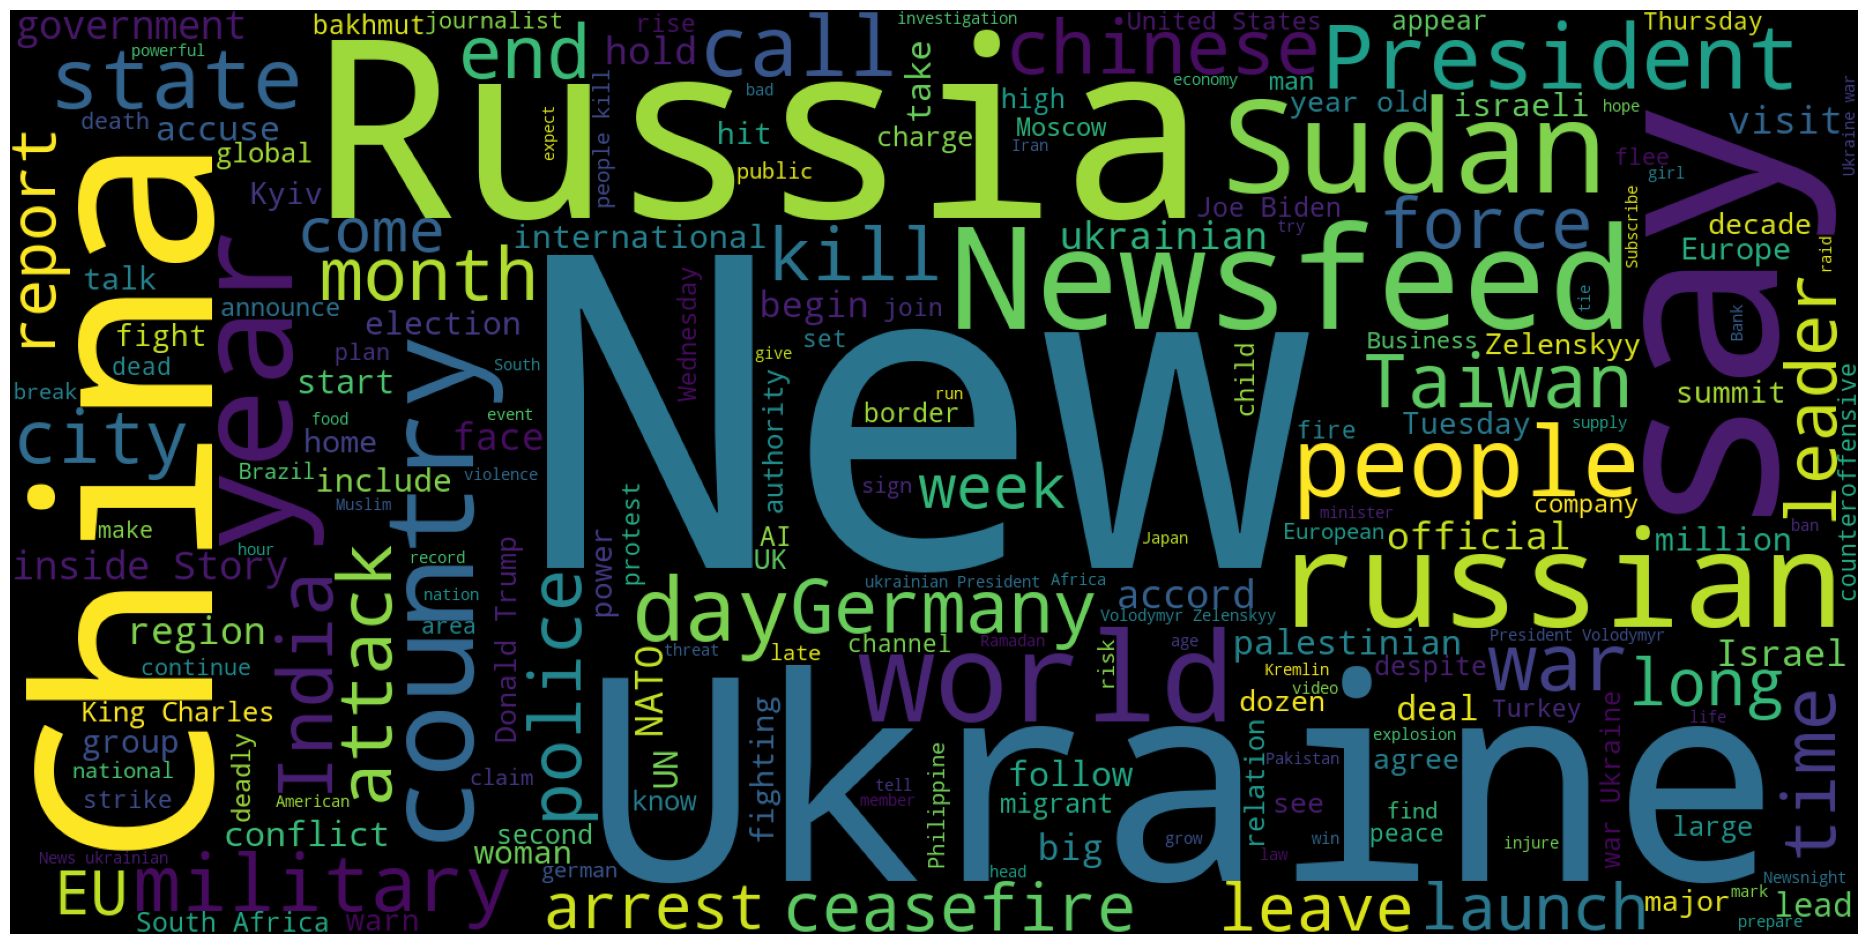

In [78]:
fig, ax = plt.subplots(figsize=(24,12))
plt.imshow(wc)
plt.axis('off')
plt.show()